In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as mcm
import scipy as sp 
import seaborn as sns

In [2]:
cd Downloads

C:\Users\hp\Downloads


In [3]:
cd titanic 

C:\Users\hp\Downloads\titanic


In [4]:
from scipy import stats

In [7]:
'''Customize visualization.'''
plt.style.use('bmh')                    # Use bmh's style for plotting
sns.set_style({'axes.grid':False})      # Removes gridlines

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [8]:
train = pd.read_csv('train.csv')

In [9]:
bold('**Preview of Train Data:**')
display(train.head(2))

**Preview of Train Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [12]:

test = pd.read_csv('test.csv')
bold('**Preview of Test Data:**')
display(test.head(2))

**Preview of Test Data:**

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [15]:
merged = pd.concat([train,test], sort = False)
bold('**Preview of Merged Data:**')
merged.head(2)

**Preview of Merged Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [17]:
bold('**Shape of the Merged Data:**')
print(merged.shape)


bold('**Name of the Variables:**')
merged.columns

**Shape of the Merged Data:**

(1309, 12)


**Name of the Variables:**

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
merged.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
def absolute_and_relative_freq(variable):
    global ax, ax1
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize= True)*100,2)
    
    df = pd.DataFrame({'Absolute Frequency': absolute_frequency,'Relative Frequency(%)': relative_frequency})
    print(df) 
    
    
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'])

SyntaxError: unexpected EOF while parsing (<ipython-input-21-e7afbbde918e>, line 2)

In [28]:
merged['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [32]:
round(merged['Survived'].value_counts(normalize = True)*100,2)

0.0    61.62
1.0    38.38
Name: Survived, dtype: float64

     Absolute_Frequency  Relative_Frequency
0.0                 549               61.62
1.0                 342               38.38
Float64Index([0.0, 1.0], dtype='float64')


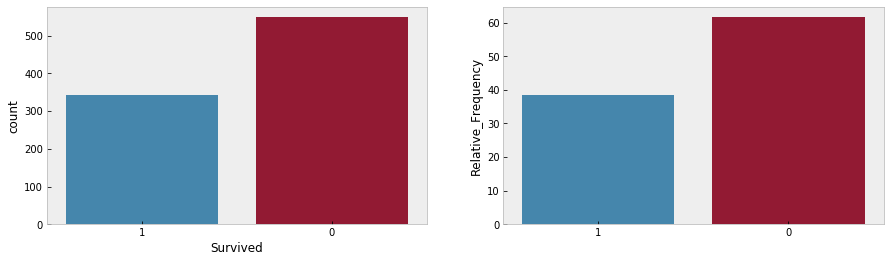

In [61]:
absolute_frequency = merged['Survived'].value_counts()
relative_frequency = round(merged['Survived'].value_counts(normalize= True)*100,2)
    
df = pd.DataFrame({'Absolute_Frequency': absolute_frequency,'Relative_Frequency': relative_frequency})
print(df) 
print(df.index)

fig, (axis1,axis2)  = plt.subplots(1,2, figsize = (15,4))  

axis1 =sns.countplot(x = 'Survived', data = merged, order = [1,0], ax = axis1 )
axis2 = sns.barplot( x= df.index, y = 'Relative_Frequency',data=df,order=[1,0],ax = axis2)                              

In [86]:
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')

    
    
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')

def absolute_relative_frequency(variable):
    global ax,ax1
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize= True)*100,2)
    df = pd.DataFrame({'Absolute Frequency': absolute_frequency, 'Relative Frequency(%)': relative_frequency})
    print(df)
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    
    ax = absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size )
    ax.title.set_size(title_size)
    abs_bar_labels()
    plt.show()
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size )
    
    ax1.title.set_size(title_size)
    pct_bar_labels()
   
    
    plt.show()
    

     Absolute Frequency  Relative Frequency(%)
0.0                 549                  61.62
1.0                 342                  38.38


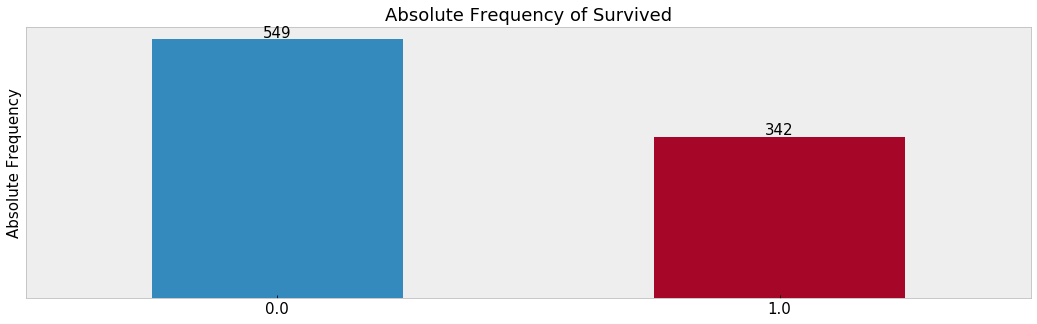

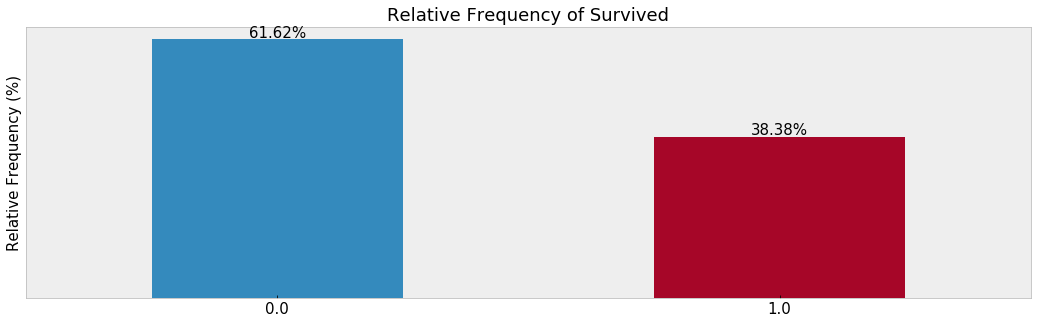

In [87]:
absolute_relative_frequency(merged['Survived'])

        Absolute Frequency  Relative Frequency(%)
male                   843                   64.4
female                 466                   35.6


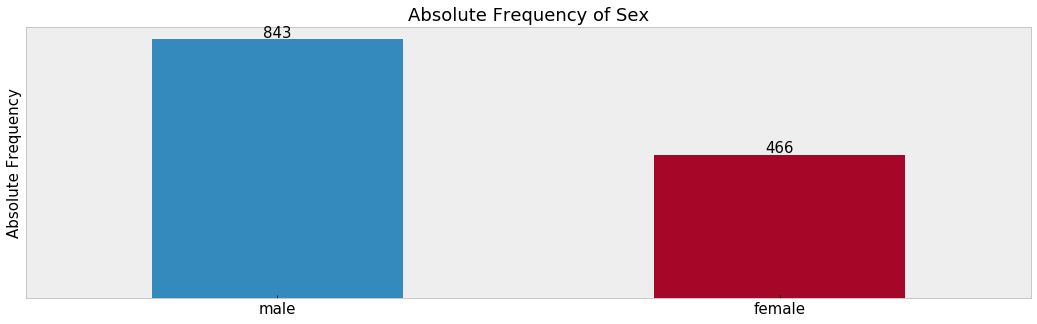

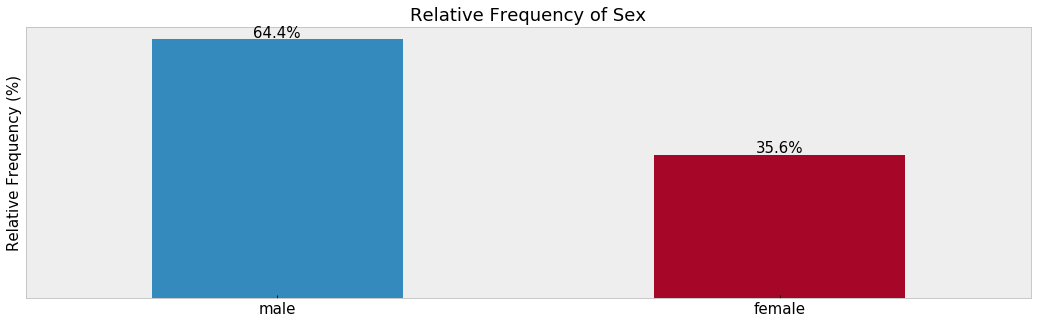

In [88]:
absolute_relative_frequency(merged['Sex'])

   Absolute Frequency  Relative Frequency(%)
3                 709                  54.16
1                 323                  24.68
2                 277                  21.16


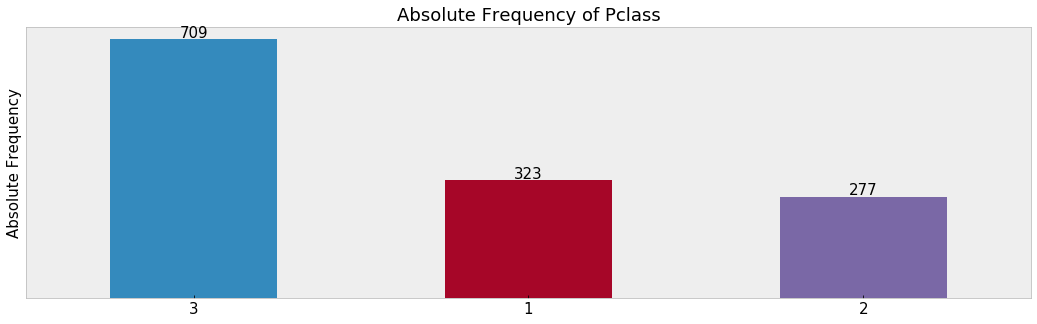

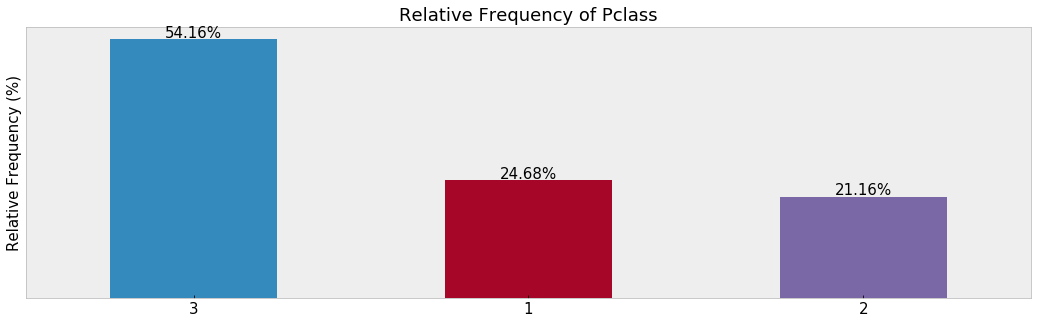

In [89]:
absolute_relative_frequency(merged['Pclass'])

   Absolute Frequency  Relative Frequency(%)
S                 914                  69.93
C                 270                  20.66
Q                 123                   9.41


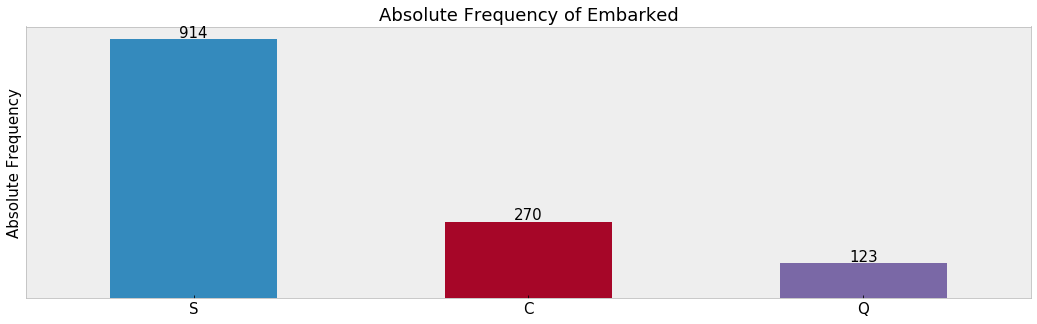

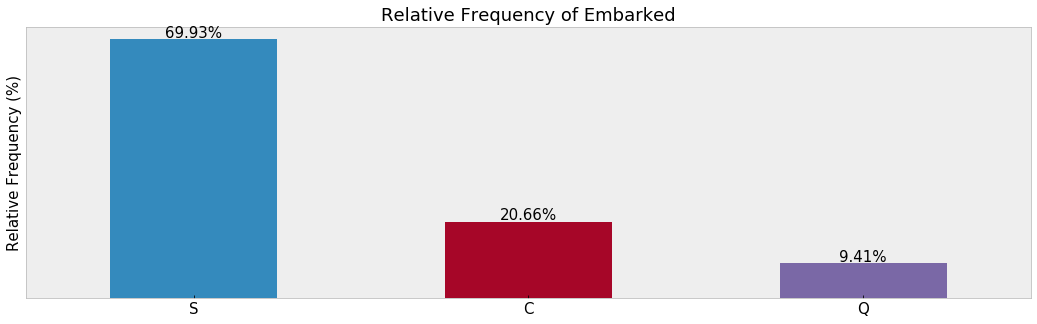

In [90]:
absolute_relative_frequency(merged['Embarked'])

In [101]:
abs_freq_cabin = merged.Cabin.value_counts(dropna = False)
print(abs_freq_cabin)
print(abs_freq_cabin.count())

merged['Cabin'].head(7)

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
B96 B98               4
F33                   4
C22 C26               4
F2                    4
D                     4
F4                    4
C78                   4
E34                   3
E101                  3
B51 B53 B55           3
B58 B60               3
C101                  3
A34                   3
C125                  2
C55 C57               2
E24                   2
D10 D12               2
D19                   2
E25                   2
B69                   2
D30                   2
E50                   2
C54                   2
C52                   2
B41                   2
C80                   2
                   ... 
A21                   1
B30                   1
B82 B84               1
C118                  1
A14                   1
C103                  1
E52                   1
C30                   1
D47                   1
C47                   1
D40             

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
Name: Cabin, dtype: object

   Absolute Frequency  Relative Frequency(%)
0                 891                  68.07
1                 319                  24.37
2                  42                   3.21
4                  22                   1.68
3                  20                   1.53
8                   9                   0.69
5                   6                   0.46


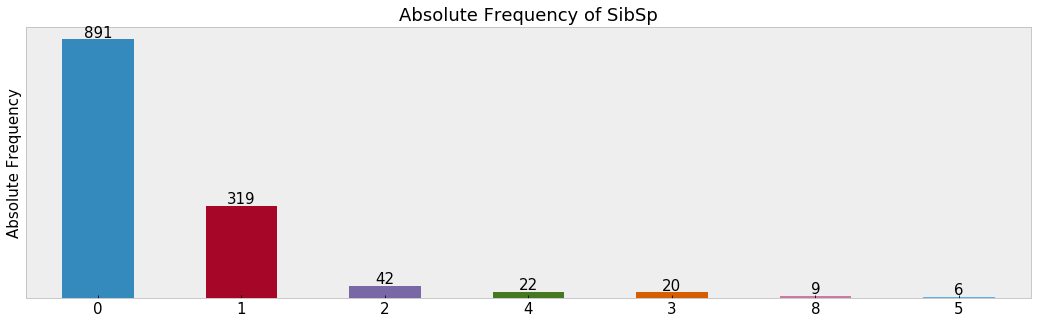

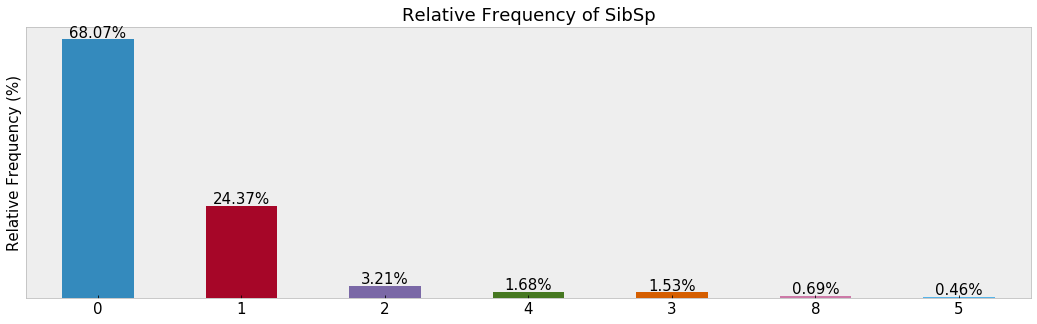

In [102]:
absolute_relative_frequency(merged['SibSp'])

   Absolute Frequency  Relative Frequency(%)
0                1002                  76.55
1                 170                  12.99
2                 113                   8.63
3                   8                   0.61
5                   6                   0.46
4                   6                   0.46
9                   2                   0.15
6                   2                   0.15


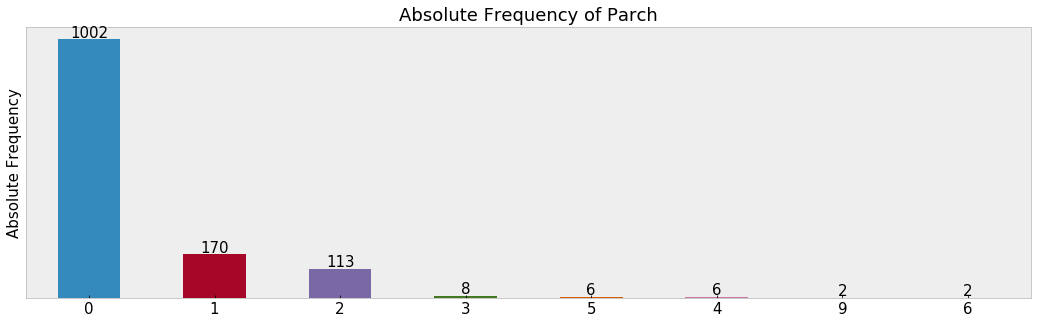

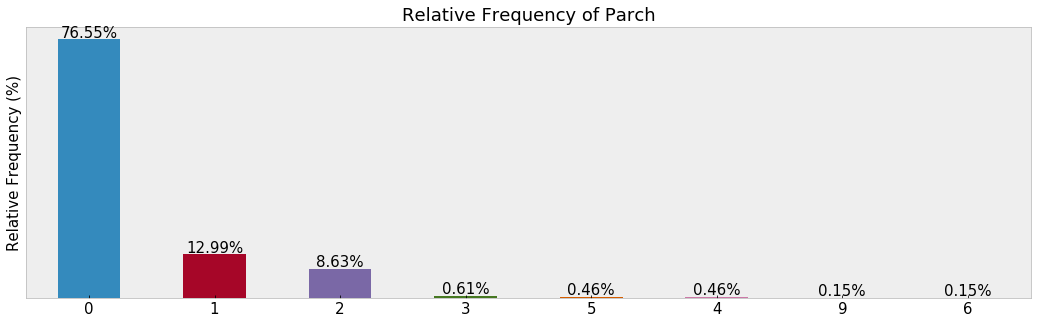

In [103]:
absolute_relative_frequency(merged['Parch'])

In [104]:
def histogram(variable) :
    global ax 
    font_size = 15
    fig_size = (18, 7)
    title_size = 18
    
    ax = variable.plot.hist(figsize = fig_size)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.title('%s' %variable.name + ' Distribution with Histogram', fontsize = title_size)
    abs_bar_labels()
    plt.show()
    
def density_plot(variable):
    fig_size = (18, 7)
    font_size = 15
    title_size = 18
    plt.figure(figsize = fig_size)
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name, fontsize = font_size)
    plt.ylabel('Density', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s ' %variable.name + 'Distribution with Density Plot & Histogram', fontsize = title_size)
    plt.show()
    

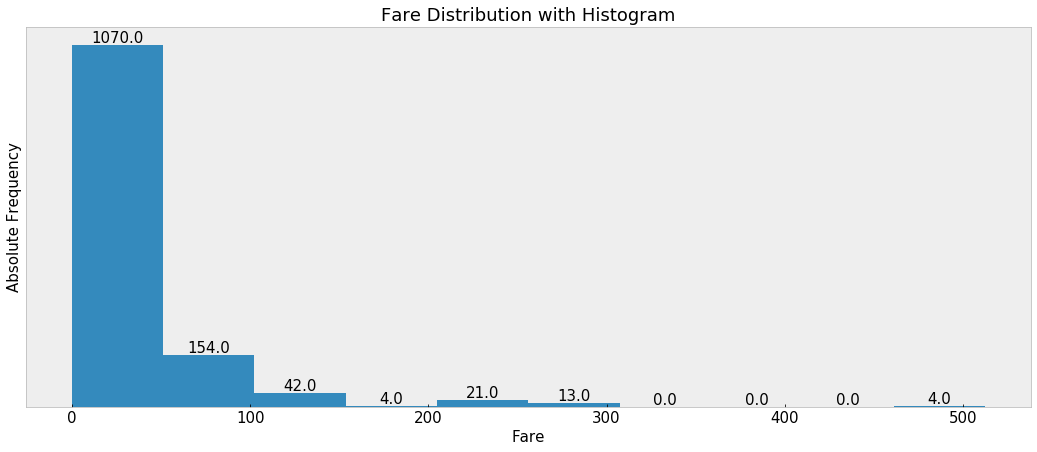

In [105]:
histogram(merged.Fare)

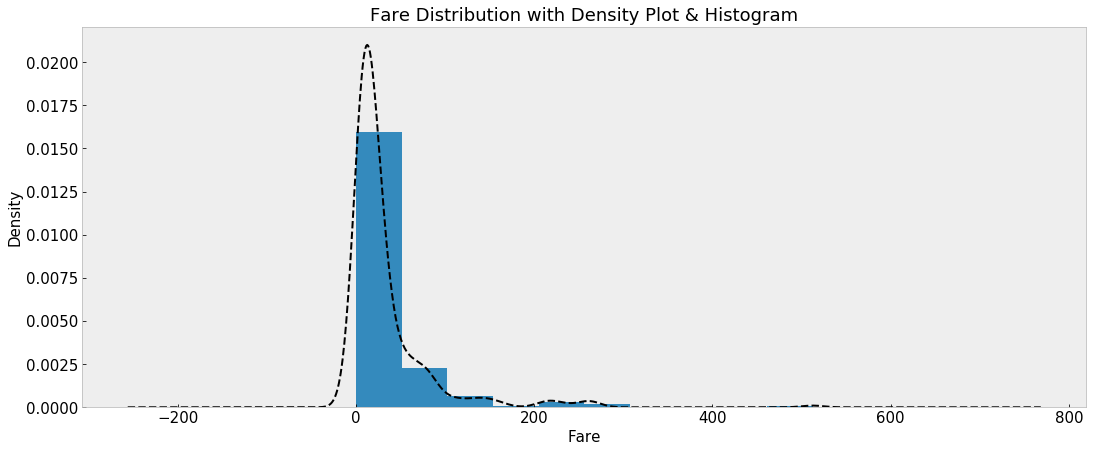

In [106]:
'''Plot density plot of Fare.'''
density_plot(merged.Fare)

In [107]:
def summary_stats(variable):
    stats = variable.describe()
    skew = pd.Series(variable.skew(), index = ['skewness'])
    df_stats = pd.DataFrame(pd.concat([skew, stats], sort = False), columns = [variable.name])
    df_stats.index.name = 'Stats'
    display(df_stats)

In [109]:
summary_stats(merged['Fare'])

,Fare
Stats,
skewness,4.367709
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


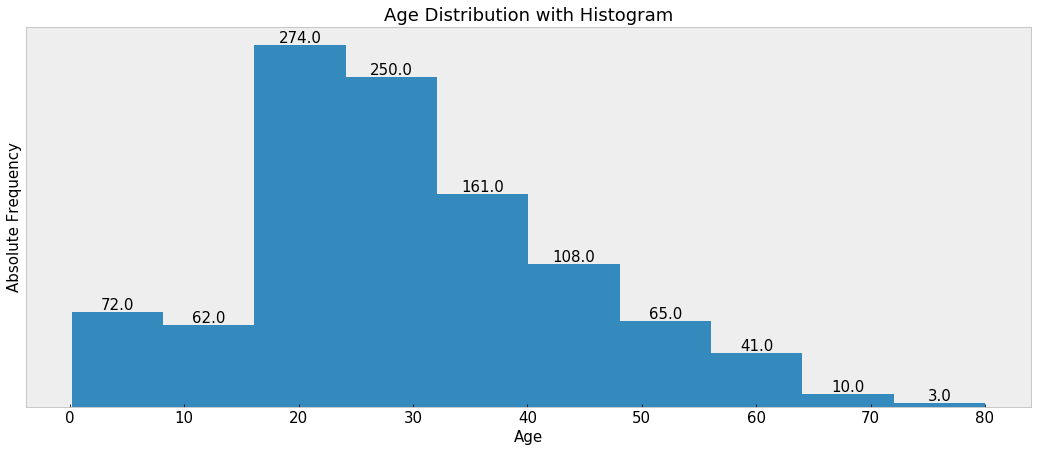

In [110]:
histogram(merged.Age)


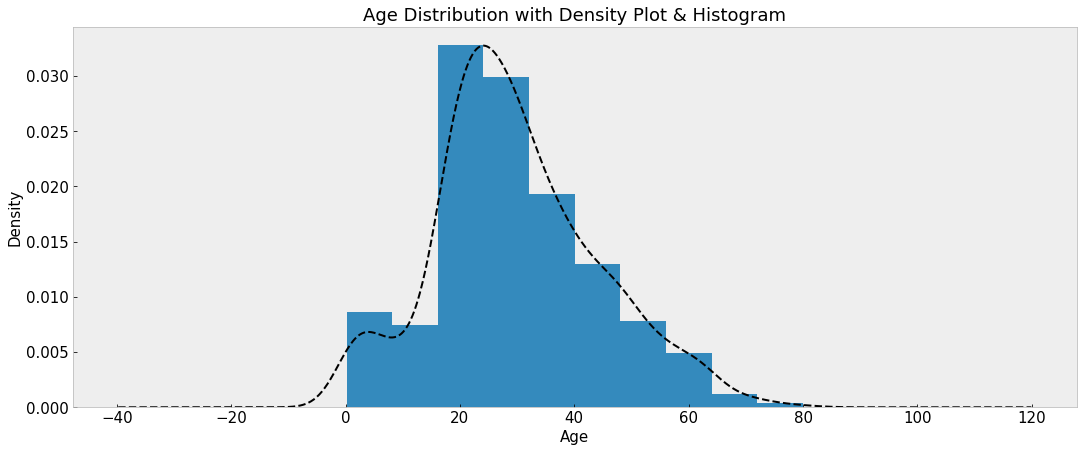

**Summary Stats of Age:**

,Age
Stats,
skewness,0.407675
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [111]:
'''Plot density plot of Age and calculate summary statistics.'''
density_plot(merged.Age)
bold('**Summary Stats of Age:**')
summary_stats(merged.Age)

In [112]:
print(merged['Cabin'].isnull().sum())

1014


In [121]:
merged['Cabin'].value_counts(dropna = False).count()

187

In [126]:
merged['Cabin'].fillna(value = 'X', inplace = True )
merged['Cabin'] = merged['Cabin'].apply(lambda x : x[0])
merged['Cabin'].value_counts()


X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

   Absolute Frequency  Relative Frequency(%)
X                1014                  77.46
C                  94                   7.18
B                  65                   4.97
D                  46                   3.51
E                  41                   3.13
A                  22                   1.68
F                  21                   1.60
G                   5                   0.38
T                   1                   0.08


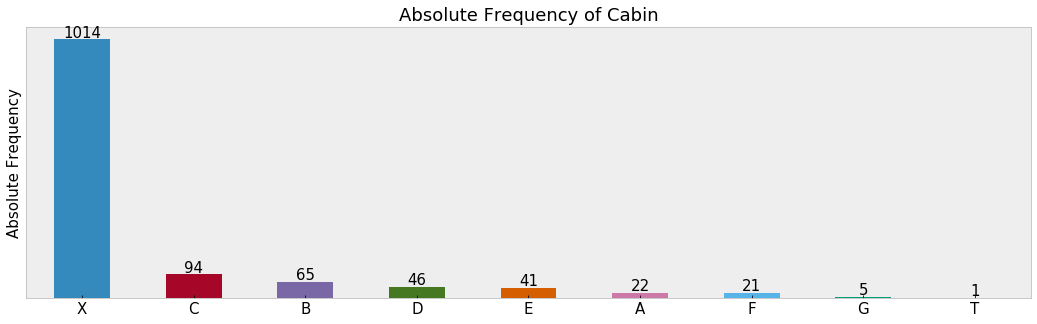

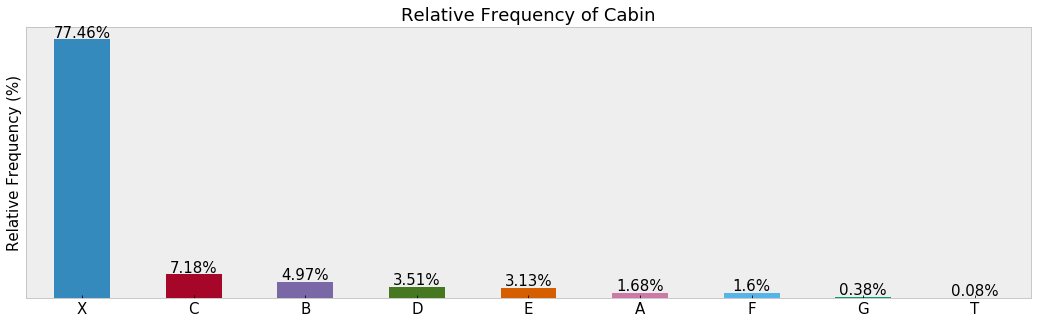

In [127]:
absolute_relative_frequency(merged['Cabin'])

In [130]:
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')

In [132]:
merged['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Capt          1
Dona          1
Jonkheer      1
Countess      1
Sir           1
Don           1
Mme           1
Name: Title, dtype: int64

In [133]:
merged.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

In [135]:
merged['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)


In [136]:
merged['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

            Absolute Frequency  Relative Frequency(%)
Mr                         757                  57.83
Miss                       264                  20.17
Mrs                        198                  15.13
Master                      61                   4.66
Officer                     23                   1.76
Aristocrat                   6                   0.46


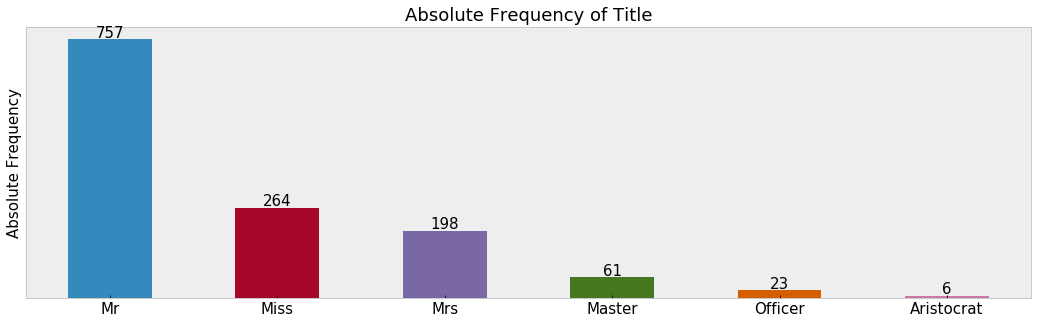

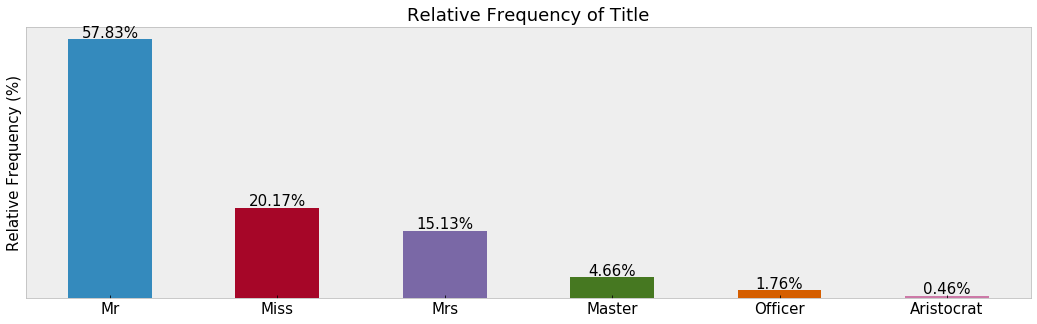

In [137]:
absolute_relative_frequency(merged['Title'])

In [141]:
merged['family size'] = merged['SibSp'] + merged['Parch']+1

In [143]:
merged['family size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: family size, dtype: int64

In [144]:
merged['family size'].replace(to_replace = [1], value = 'Singal',inplace = True)

In [145]:
merged['family size'].replace(to_replace = [2,3], value = 'Small',inplace = True)
merged['family size'].replace(to_replace = [4,5], value = 'medium',inplace = True)
merged['family size'].replace(to_replace = [6,7,8,11], value = 'large',inplace = True)

        Absolute Frequency  Relative Frequency(%)
Singal                 790                  60.35
Small                  394                  30.10
medium                  65                   4.97
large                   60                   4.58


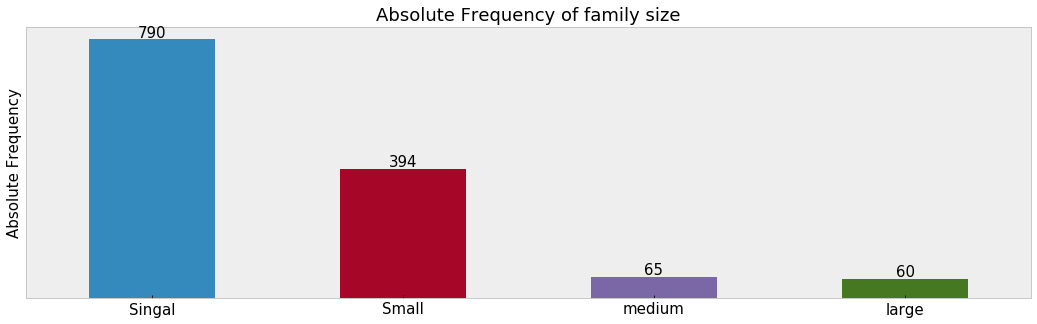

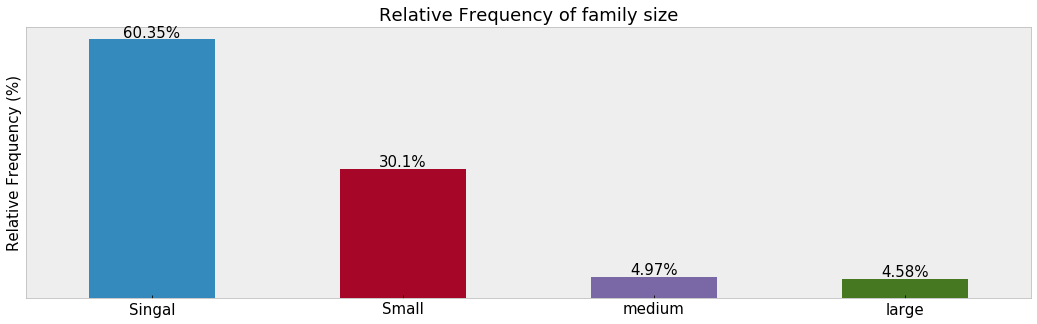

In [148]:
absolute_relative_frequency(merged['family size'])


In [150]:
merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,Singal
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr,Singal
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,X,Q,Mr,Singal
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,Mr,Singal
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,X,S,Master,medium
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,X,S,Mrs,Small
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,X,C,Mrs,Small


In [151]:
ticket = []
for x in list(merged.Ticket):
    if x.isdigit():
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
        
'''Swap values'''
merged.Ticket = ticket

'''Count the categories in Ticket.'''
bold('**Categories of Ticket:**')
display(merged.Ticket.value_counts())

**Categories of Ticket:**

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
C            8
SOC          8
STONO2       7
SOPP         7
SCAH         5
SCParis      5
WEP          4
PP           4
LINE         4
SOTONO2      3
FC           3
SC           2
PPP          2
SCA4         2
SWPP         2
SOP          1
AS           1
A            1
AQ3          1
SCA3         1
LP           1
Fa           1
STONOQ       1
SCOW         1
CASOTON      1
AQ4          1
SP           1
Name: Ticket, dtype: int64

**Ticket after Processing:**

N    957
S     98
P     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

   Absolute Frequency  Relative Frequency(%)
N                 957                  73.11
S                  98                   7.49
P                  98                   7.49
C                  77                   5.88
A                  42                   3.21
W                  19                   1.45
F                  13                   0.99
L                   5                   0.38


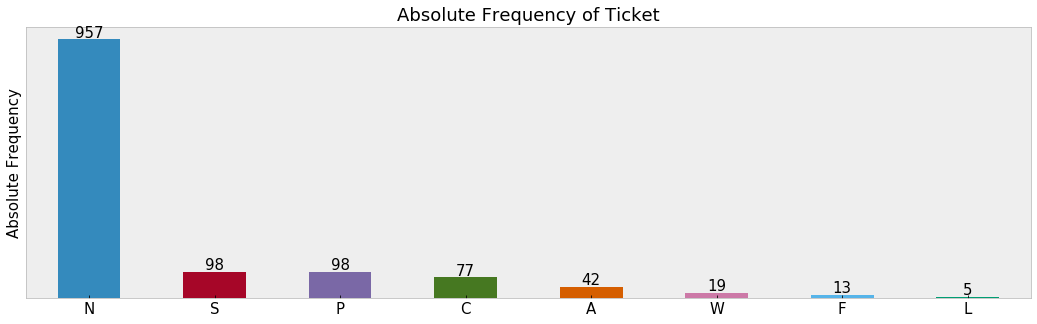

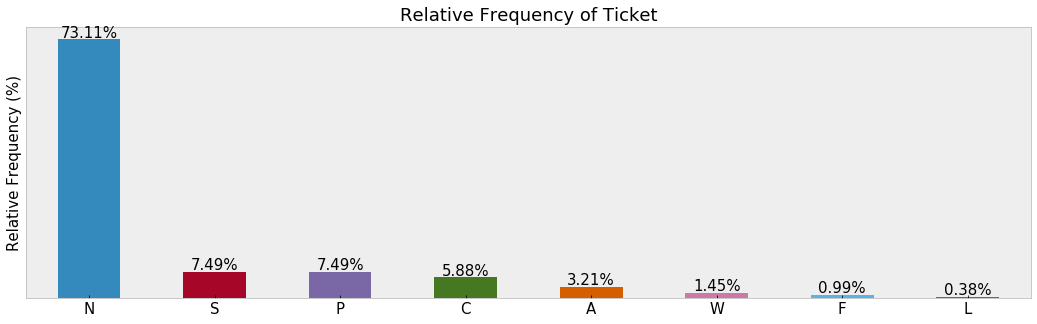

In [153]:
merged.Ticket = merged.Ticket.apply(lambda x : x[0])
bold('**Ticket after Processing:**')
display(merged.Ticket.value_counts())

absolute_relative_frequency(merged['Ticket'])


In [174]:


q1= merged['Age'].quantile(0.25)
q3 = merged['Age'].quantile(0.75)
iqr = q3-q1
    
l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr
print(l_fence)
outliers = merged['Age'][(merged['Age']<l_fence) | (merged['Age']>u_fence)]
print('Total Outliers of', merged['Age'].name,':', outliers.count())

filtered = merged['Age'].drop(outliers.index, axis = 0)

out_variables = [merged['Age'], filtered]
print(out_variables)

-6.0
Total Outliers of Age : 9
[0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408     NaN
409     3.0
410     NaN
411    37.0
412    28.0
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 1309, dtype: float64, 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16 

In [175]:
def outliers(variable):
    global filtered
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    out_variables = [variable, filtered]
    out_titles = [' Distribution with Outliers', ' Distribution Without Outliers']
    title_size = 25
    font_size = 18
    plt.figure(figsize = (25, 15))
    for ax, outlier, title in zip(range(1,3), out_variables, out_titles):
        plt.subplot(2, 1, ax)
        sns.boxplot(outlier).set_title('%s' %outlier.name + title, fontsize = title_size)
        plt.xticks(fontsize = font_size)
        plt.xlabel('%s' %outlier.name, fontsize = font_size)

Total Outliers of Age : 9


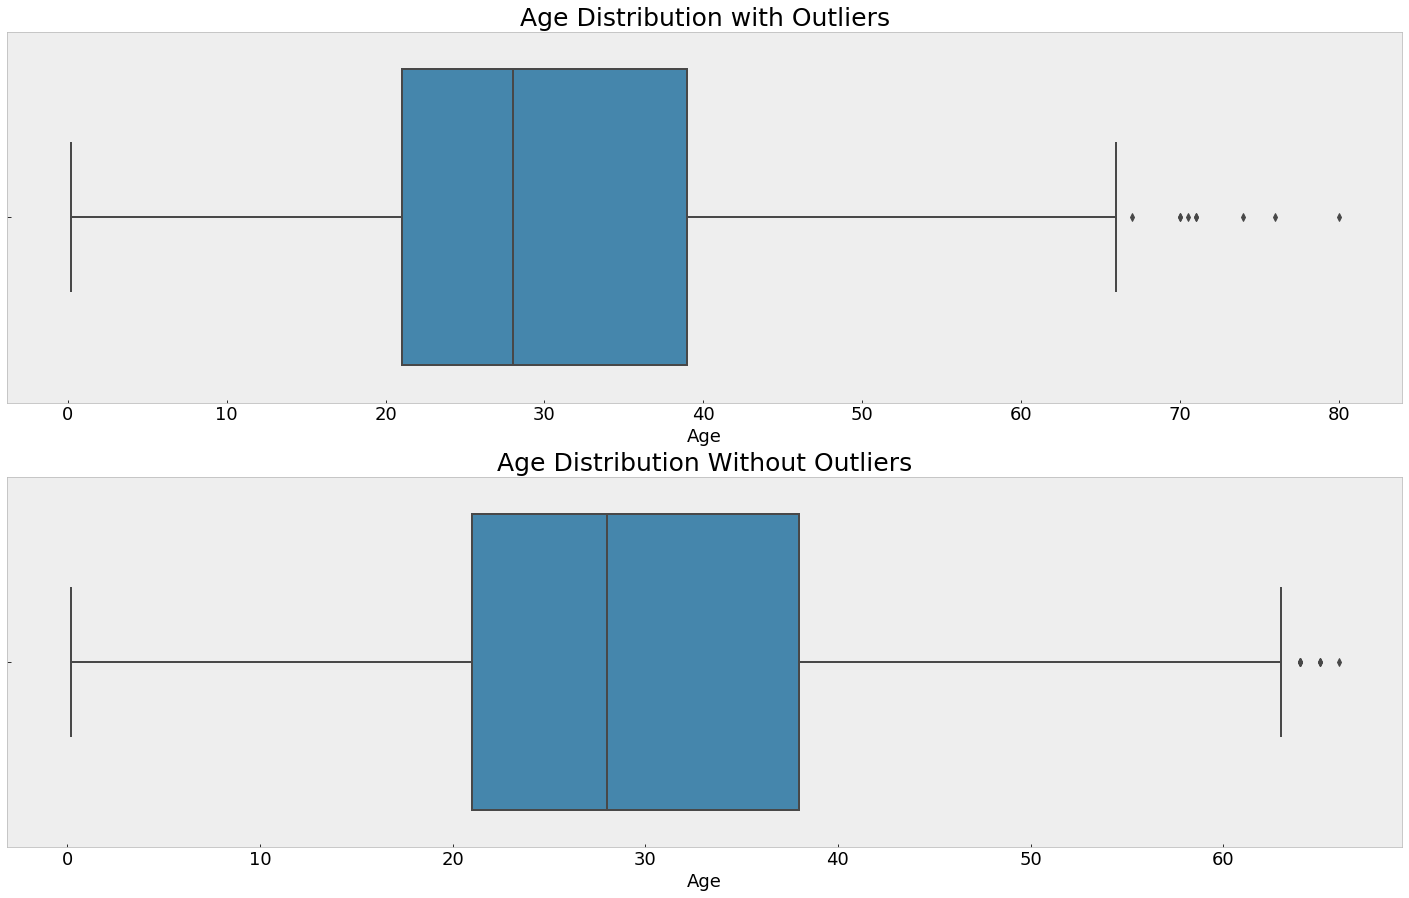

In [176]:
outliers(merged['Age'])

Total Outliers of Fare : 171


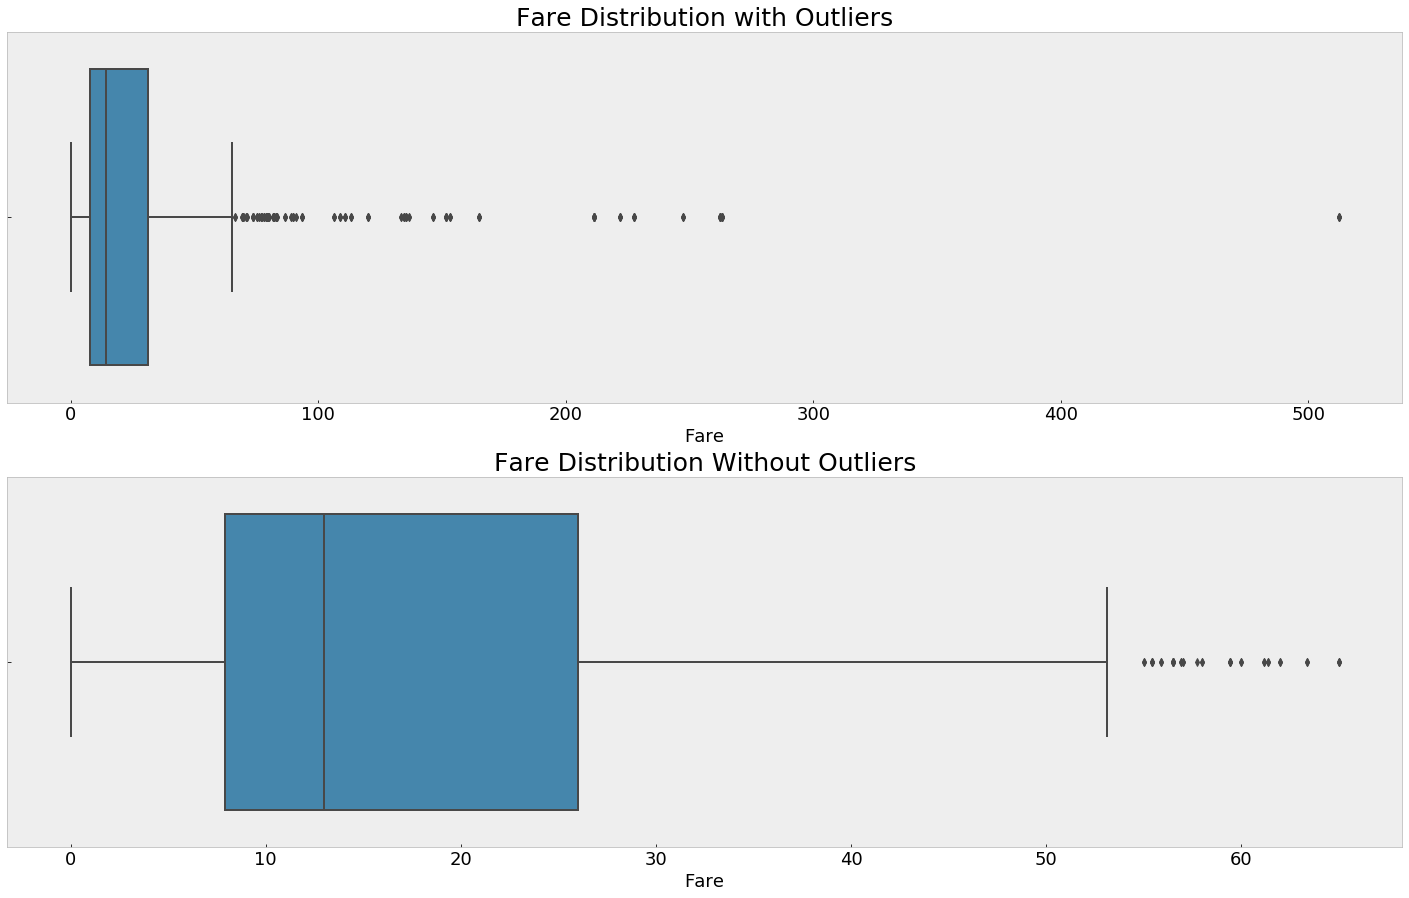

In [177]:
outliers(merged['Fare'])

In [178]:
mn.matrix(merged)


NameError: name 'mn' is not defined

In [184]:
merged.isnull().sum()


PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
family size      0
dtype: int64

In [185]:
merged['Embarked'].fillna(value = 'S', inplace = True)

In [186]:
merged['Fare'].fillna(value = merged['Fare'].median(), inplace = True )

In [187]:
merged.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
family size      0
dtype: int64

In [200]:
merged['family size']

0       Small
1       Small
2      Singal
3       Small
4      Singal
5      Singal
6      Singal
7      medium
8       Small
9       Small
10      Small
11     Singal
12     Singal
13      large
14     Singal
15     Singal
16      large
17     Singal
18      Small
19     Singal
20     Singal
21     Singal
22     Singal
23     Singal
24     medium
25      large
26     Singal
27      large
28     Singal
29     Singal
        ...  
388    Singal
389    medium
390    Singal
391     Small
392     Small
393    Singal
394    medium
395     Small
396    Singal
397     Small
398    Singal
399    Singal
400    Singal
401     Small
402     Small
403    Singal
404     Small
405    Singal
406     Small
407     Small
408    Singal
409     Small
410    Singal
411     Small
412    Singal
413    Singal
414    Singal
415    Singal
416    Singal
417     Small
Name: family size, Length: 1309, dtype: object

In [201]:
correlation = merged.loc[:,['Sex', 'Pclass', 'Embarked', 'Title', 'family size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]

In [202]:
correlation

,Sex,Pclass,Embarked,Title,family size,Parch,SibSp,Cabin,Ticket
0,male,3,S,Mr,Small,0,1,X,A
1,female,1,C,Mrs,Small,0,1,C,P
2,female,3,S,Miss,Singal,0,0,X,S
3,female,1,S,Mrs,Small,0,1,C,N
4,male,3,S,Mr,Singal,0,0,X,N
5,male,3,Q,Mr,Singal,0,0,X,N
6,male,1,S,Mr,Singal,0,0,E,N
7,male,3,S,Master,medium,1,3,X,N
8,female,3,S,Mrs,Small,2,0,X,N
9,female,2,C,Mrs,Small,0,1,X,N


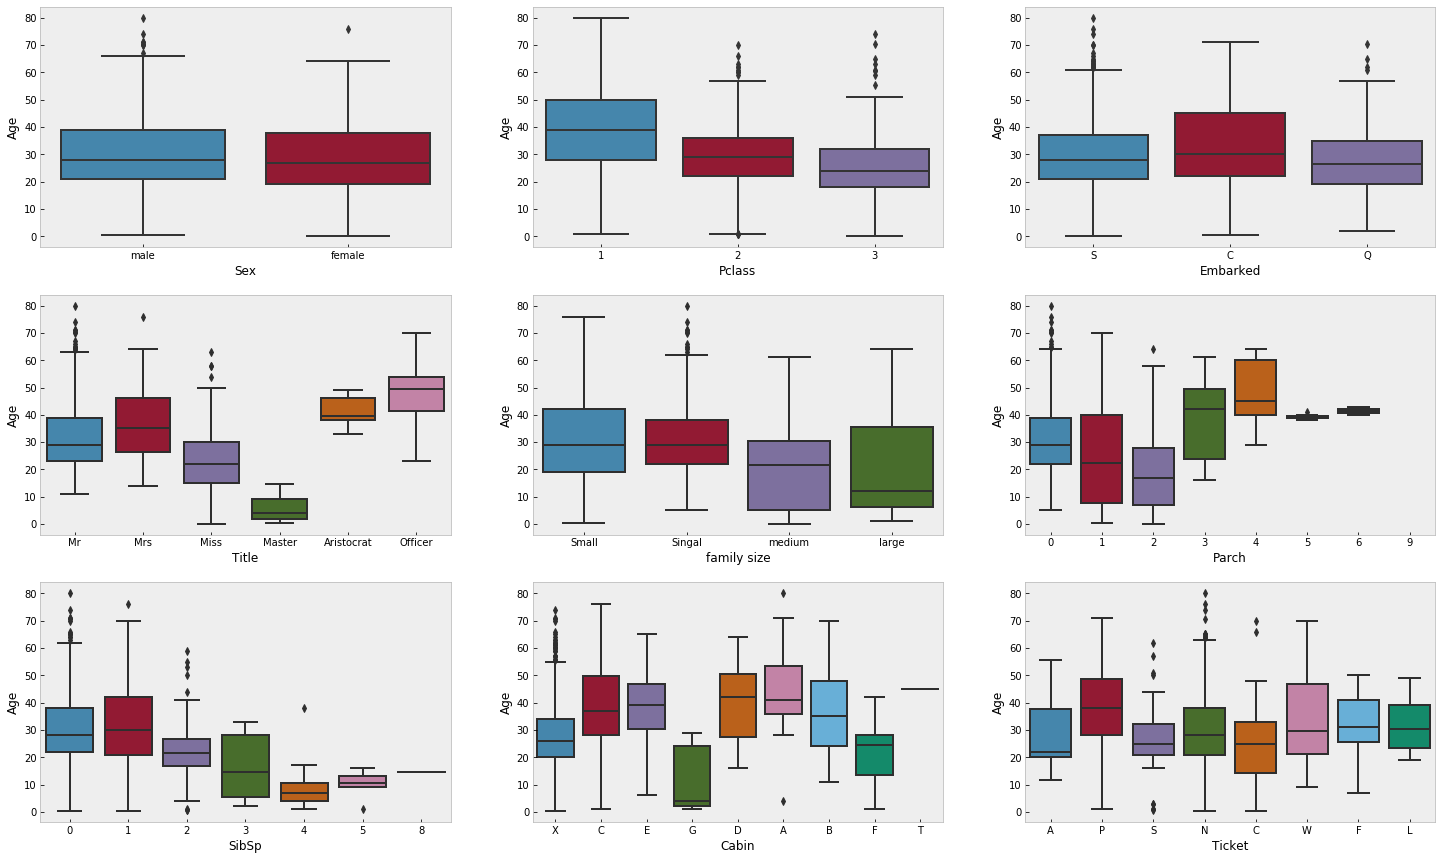

In [203]:

plt.figure(figsize = (25,15))

for ax, columns in zip(range(1,10), correlation):
    plt.subplot(3,3,ax)
    sns.boxplot(x = columns, y = merged['Age'], data = correlation)

    
    

In [204]:
from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)

In [211]:
correlation['Age']= merged['Age']

In [215]:
correlation.set_index('Age').reset_index()


,Age,Sex,Pclass,Embarked,Title,family size,Parch,SibSp,Cabin,Ticket
0,22.0,1,2,2,3,1,0,1,8,0
1,38.0,0,0,0,4,1,0,1,2,5
2,26.0,0,2,2,2,0,0,0,8,6
3,35.0,0,0,2,4,1,0,1,2,4
4,35.0,1,2,2,3,0,0,0,8,4
5,NaN,1,2,1,3,0,0,0,8,4
6,54.0,1,0,2,3,0,0,0,4,4
7,2.0,1,2,2,1,3,1,3,8,4
8,27.0,0,2,2,4,1,2,0,8,4
9,14.0,0,1,0,4,1,0,1,8,4


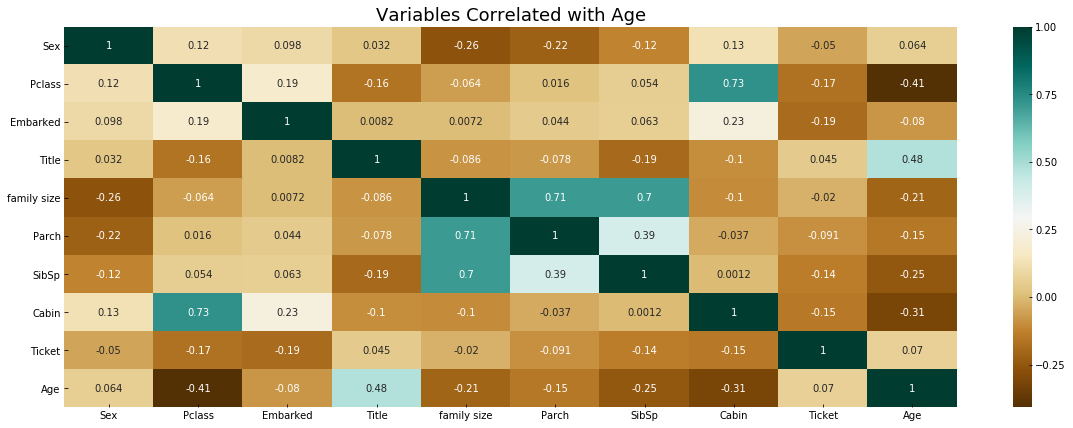

In [216]:
plt.figure(figsize = (20,7))
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables Correlated with Age', fontsize = 18)
plt.show()

In [220]:
merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,X,S,Mr,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C,C,Mrs,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,7.9250,X,S,Miss,Singal
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,N,53.1000,C,S,Mrs,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,N,8.0500,X,S,Mr,Singal
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,N,8.4583,X,Q,Mr,Singal
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,N,51.8625,E,S,Mr,Singal
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,N,21.0750,X,S,Master,medium
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,N,11.1333,X,S,Mrs,Small
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,N,30.0708,X,C,Mrs,Small


In [219]:
merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      26.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     26.0
27     19.0
28     18.0
29     26.0
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    18.0
409     3.0
410    18.0
411    37.0
412    28.0
413    26.0
414    39.0
415    38.5
416    26.0
417     6.0
Name: Age, Length: 1309, dtype: float64

In [221]:
merged.Age = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [224]:
print(merged.isnull().sum())

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
family size      0
dtype: int64


In [227]:
df_train = merged.iloc[:891, : ]
df_test = merged.iloc[891: , : ]
df_test = df_test.drop(['Survived'], axis = 1)

In [229]:
def boxplot_coorelation(cat, num ):
    plt.figure(figsize = (18,7))
    title_size = 18
    font_size = 15
    ax = sns.boxplot(x = cat, y= num)
    
    box = ax.artists[0]
    box1 = ax.artists[1]
    
    # Change the appearance of that box
    box.set_facecolor('red')
    box1.set_facecolor('green')
    plt.title('Association between Survived & %s' %num.name, fontsize = title_size)
    plt.xlabel('%s' %cat.name, fontsize = font_size)
    plt.ylabel('%s' %num.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.show()
    print('Correlation between', num.name,'and', cat.name, ':', stats.pointbiserialr(num,cat))
    

In [232]:
df_t

,Absolute_Frequency,Relative_Frequency
0.0,549,61.62
1.0,342,38.38


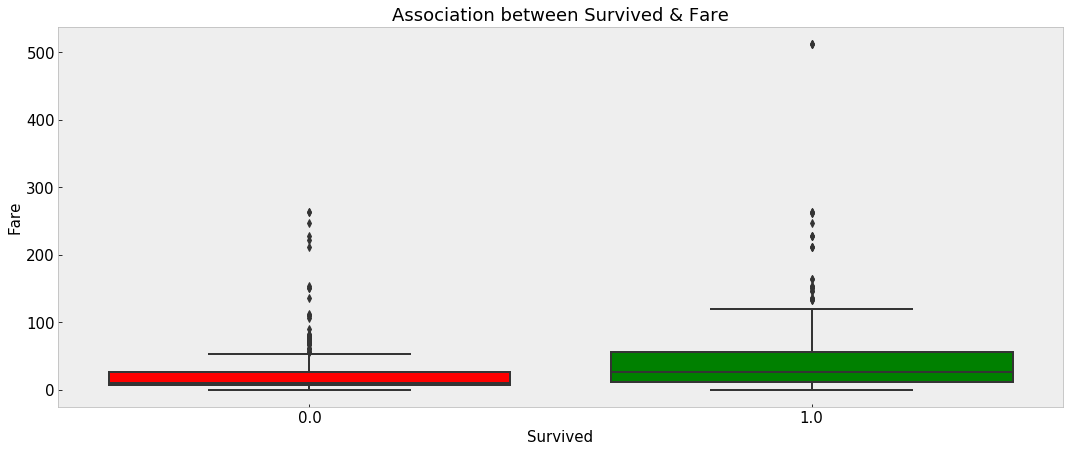

Correlation between Fare and Survived : PointbiserialrResult(correlation=0.25730652238496243, pvalue=6.120189341921873e-15)


In [233]:
boxplot_coorelation(df_train['Survived'], df_train['Fare'])

In [239]:
def nume_grouped_by_cat(num,cat):
    global ax
    font_size = 15
    title_size = 18
    
    grouped_by_cat = num.groupby(cat).mean().sort_values(ascending =False)
    grouped_by_cat = round(grouped_by_cat, 2)
    ax = grouped_by_cat.plot.bar(figsize=(18,5))
    abs_bar_labels()
    plt.title('Mean %s ' %num.name + ' of Survivors vs Victims', fontsize = title_size)
    plt.ylabel('Mean ' + '%s' %num.name, fontsize = font_size)
    plt.xlabel('%s' %cat.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.show()
    

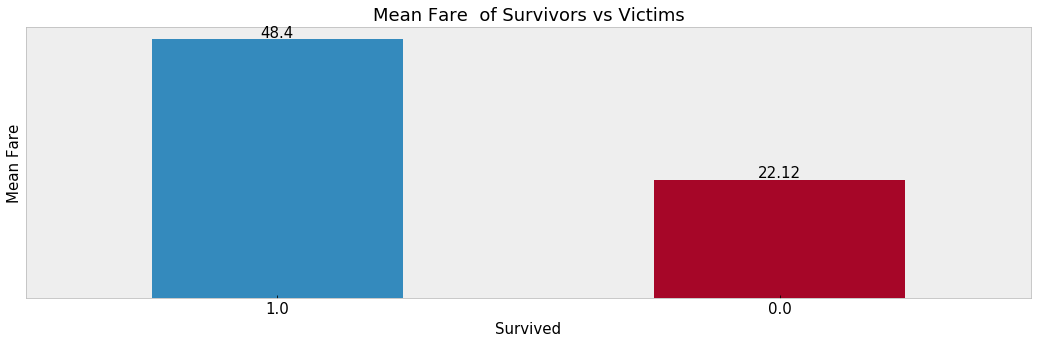

In [242]:
nume_grouped_by_cat(df_train['Fare'], df_train['Survived'])

In [243]:
def num_hist_by_cat(num, cat):
    font_size = 15
    title_size = 18
    plt.figure(figsize = (18,7))
    num[cat == 1].hist(color = ['g'], label = 'Survived', grid = True)
    num[cat == 0].hist(color = ['r'], label = 'Survived', grid = True)

    plt.yticks([])
    plt.xticks(fontsize = font_size)
    plt.xlabel('%s' %num.name, fontsize = font_size)
    plt.title('%s ' %num.name + ' Distribution of Survivors vs Victims', fontsize = title_size)
    plt.legend()
    plt.show()

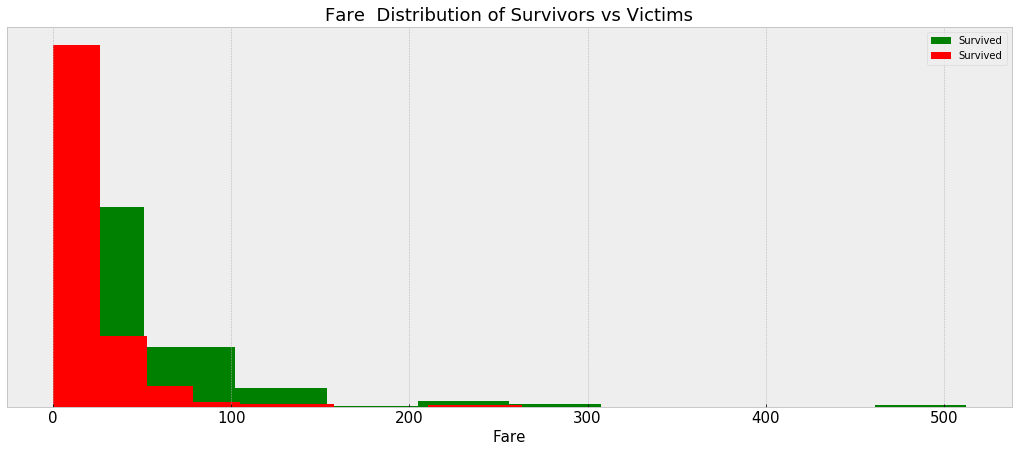

In [244]:
num_hist_by_cat(df_train['Fare'], df_train['Survived'])

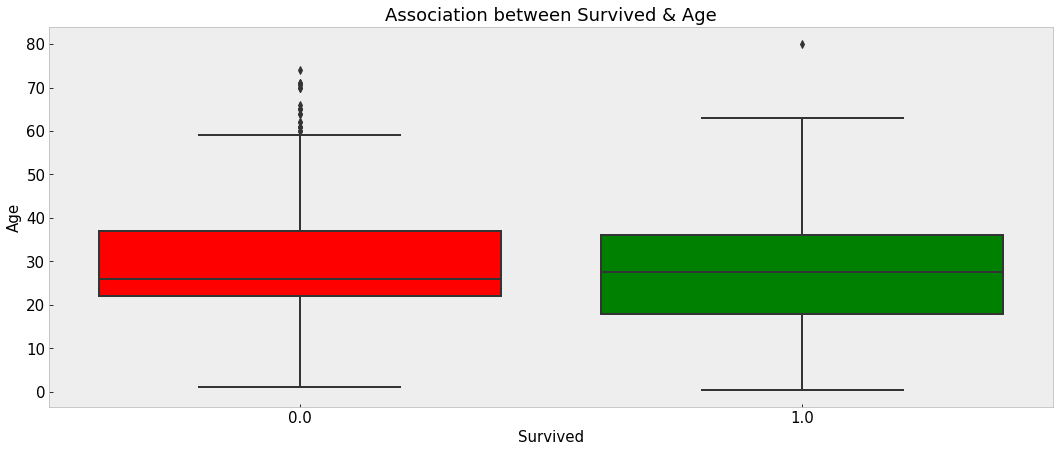

Correlation between Age and Survived : PointbiserialrResult(correlation=-0.05953689941956393, pvalue=0.07569419096180038)


In [245]:
boxplot_coorelation(df_train['Survived'], df_train['Age'])

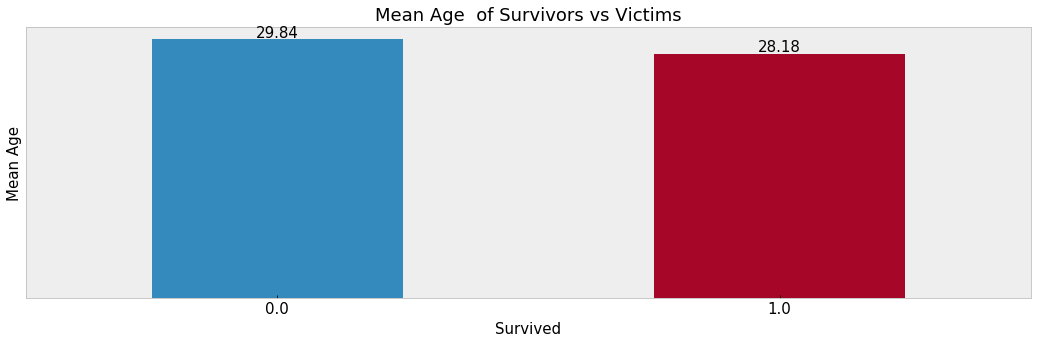

In [246]:
nume_grouped_by_cat(df_train['Age'], df_train['Survived'])

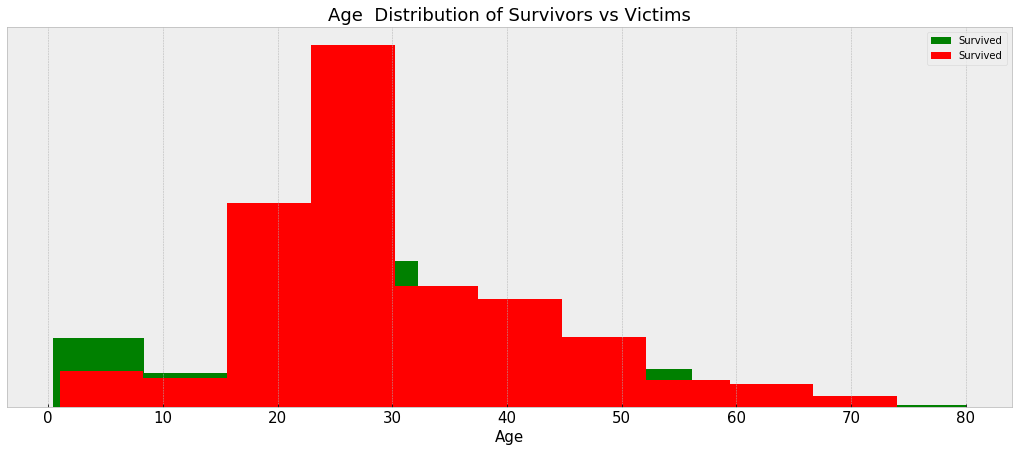

In [247]:
num_hist_by_cat(df_train['Age'], df_train['Survived'])

In [248]:
####crosstab function
pd.crosstab(index = df_train['Sex'], columns = df_train['Survived'])

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


In [249]:
def crosstab(cat, cat_target):
    global ax, ax1
    fig_size = (18,5)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    ax =  cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'], title = 'Absolute Count of Survival and Death by %s' %cat.name, figsize = fig_size)
    ax.title.set_size(fontsize = title_size)
    abs_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()
    
    # Plot relative frequrncy of Survived by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'], title = 'Percentage Count of Survival and Death by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()

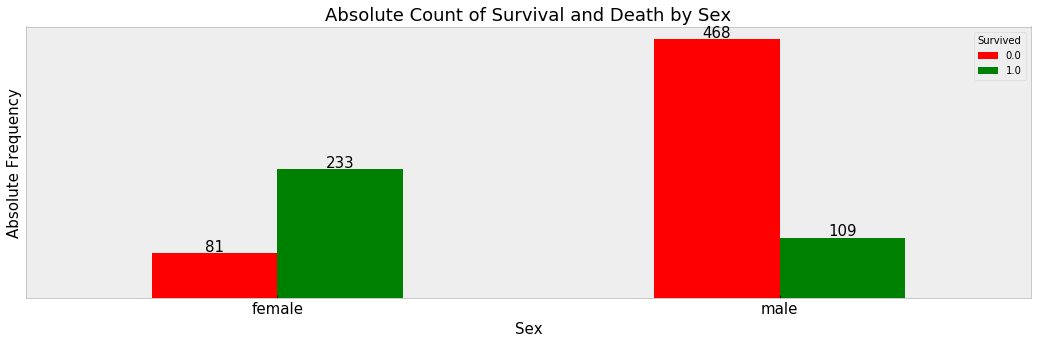

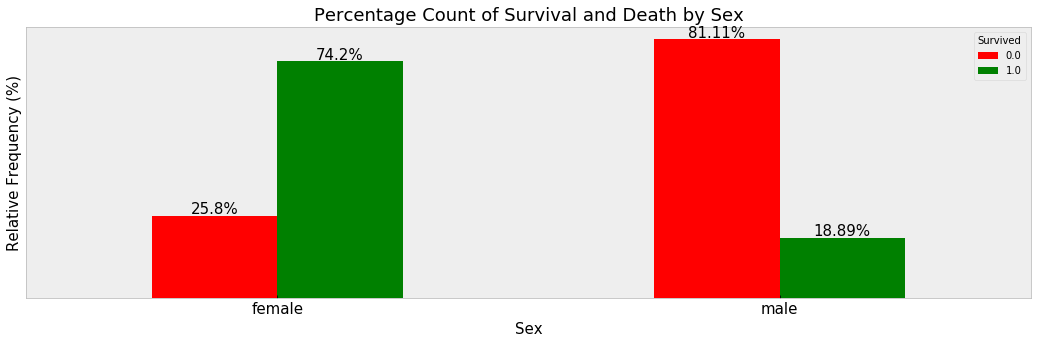

In [250]:
crosstab(df_train['Sex'], df_train['Survived'])

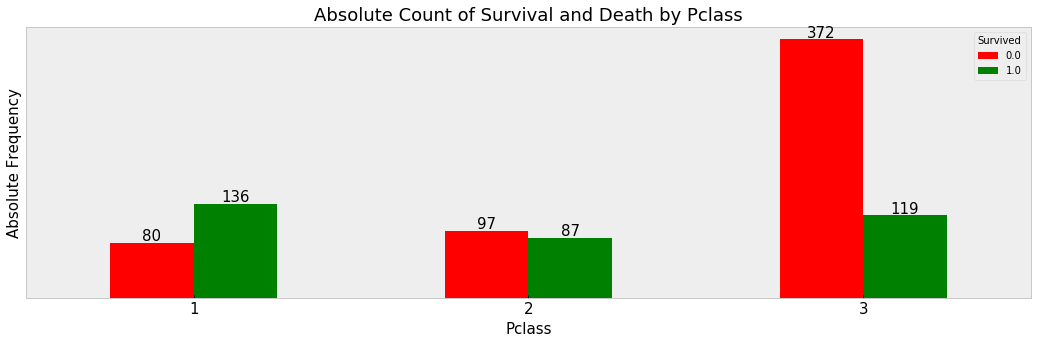

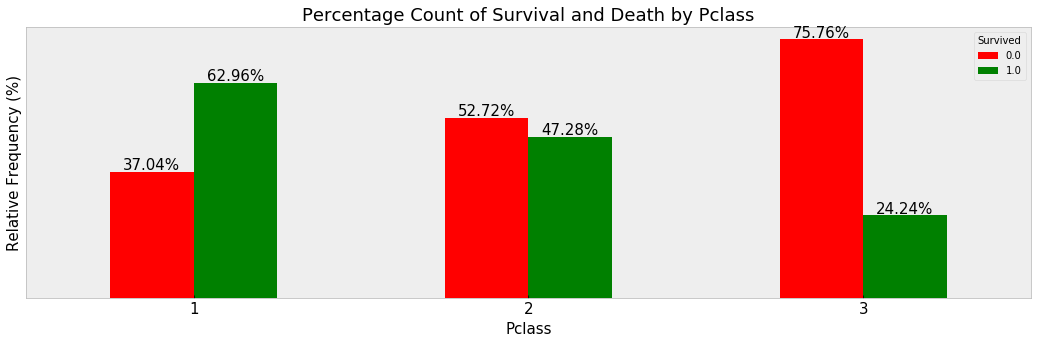

In [251]:
crosstab(df_train['Pclass'], df_train['Survived'])

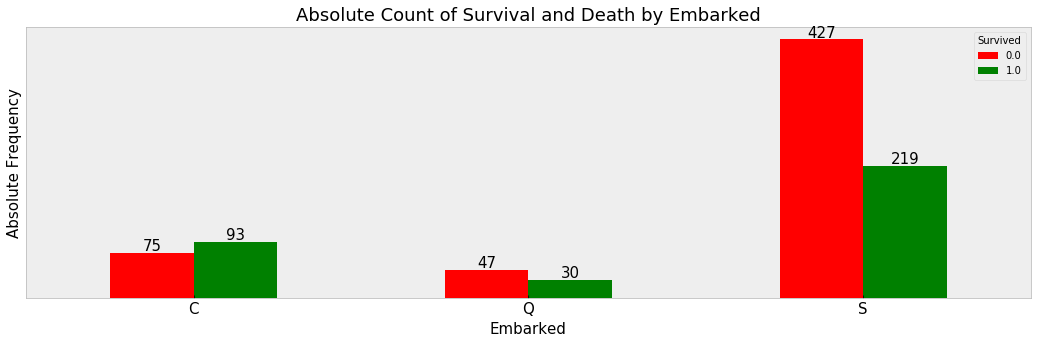

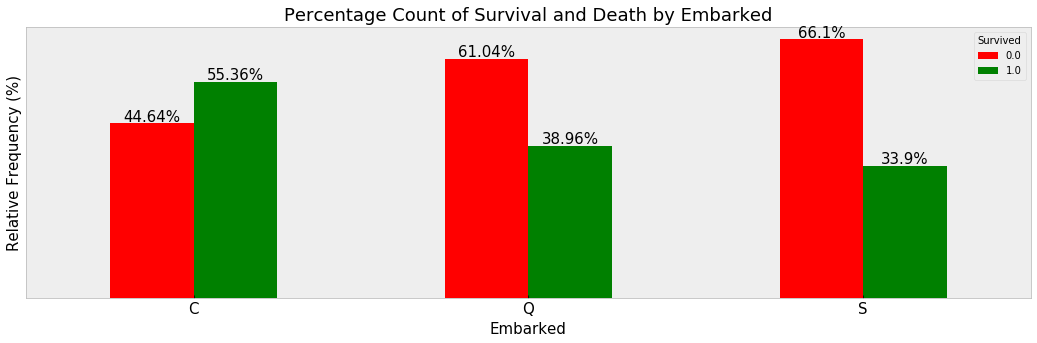

In [252]:
crosstab(df_train['Embarked'], df_train['Survived'])

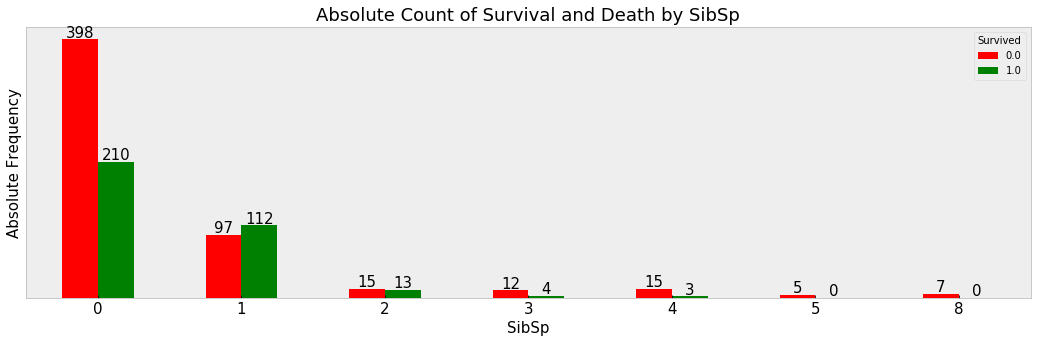

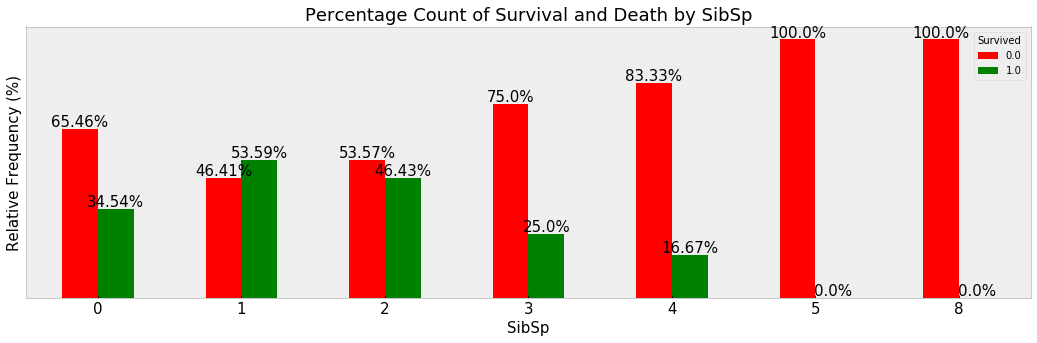

In [253]:
crosstab(df_train['SibSp'], df_train['Survived'])

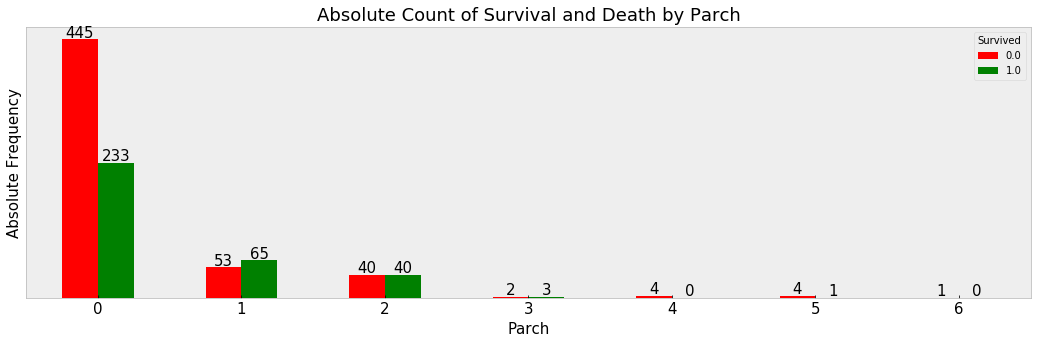

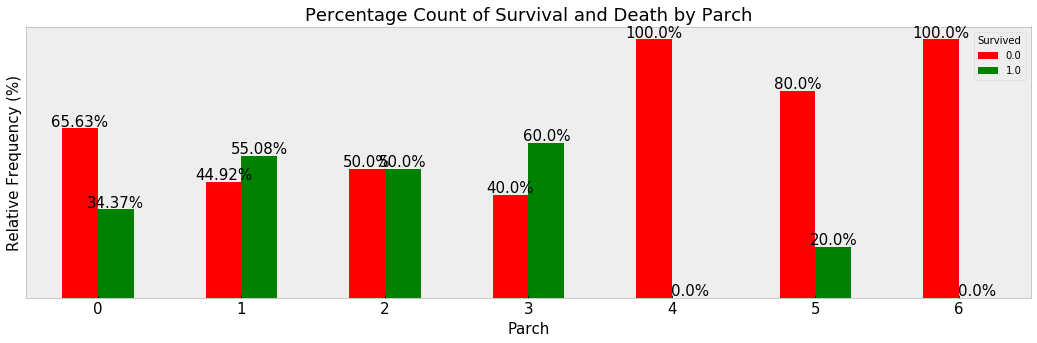

In [254]:
crosstab(df_train['Parch'], df_train['Survived'])

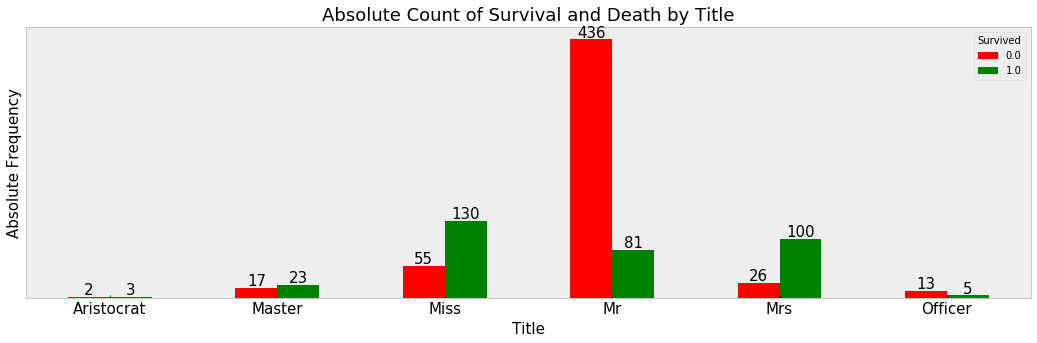

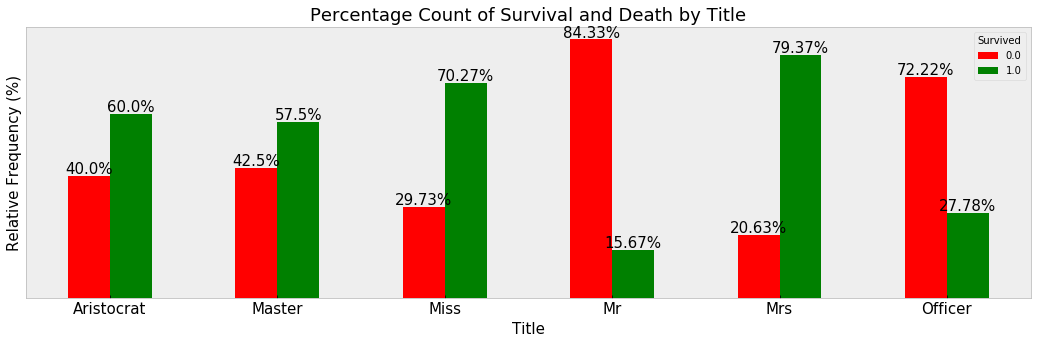

In [255]:
crosstab(df_train['Title'], df_train['Survived'])

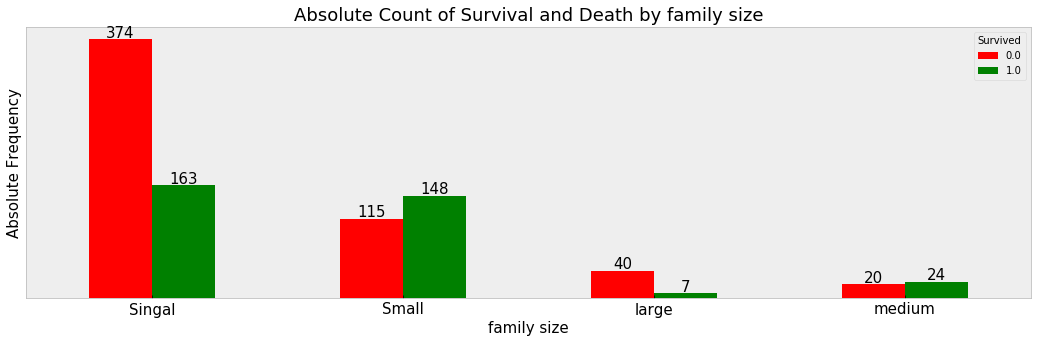

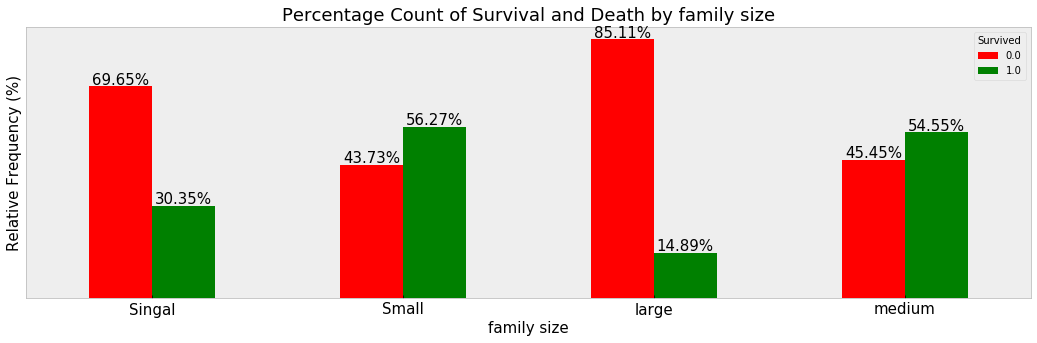

In [257]:
crosstab(df_train['family size'], df_train['Survived'])

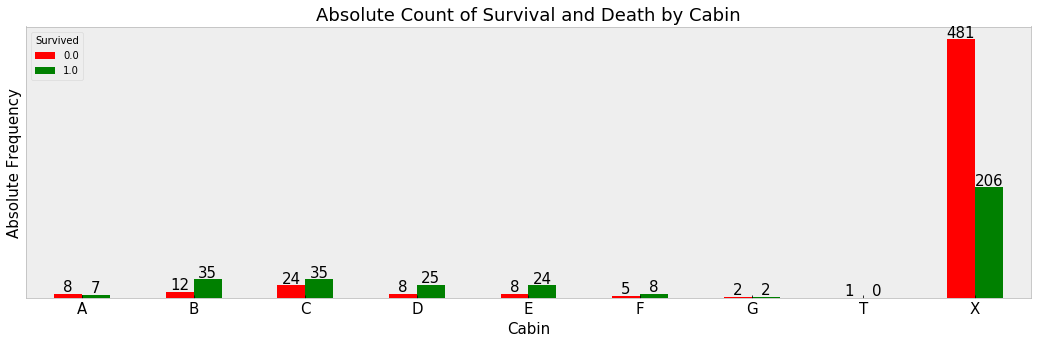

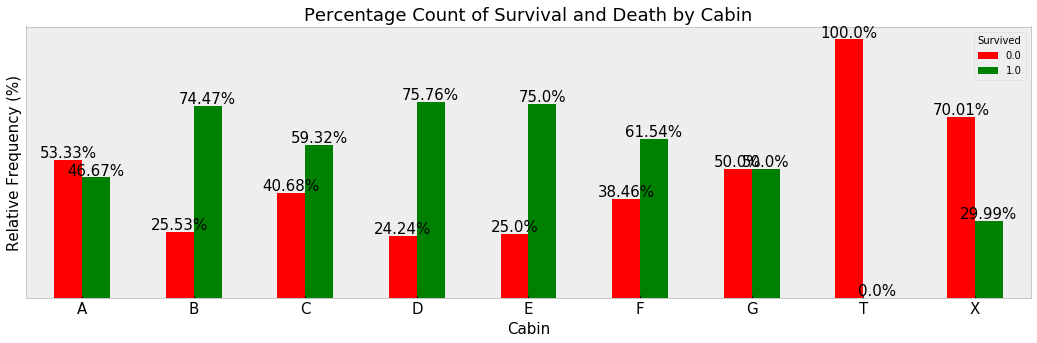

In [258]:
crosstab(df_train['Cabin'], df_train['Survived'])

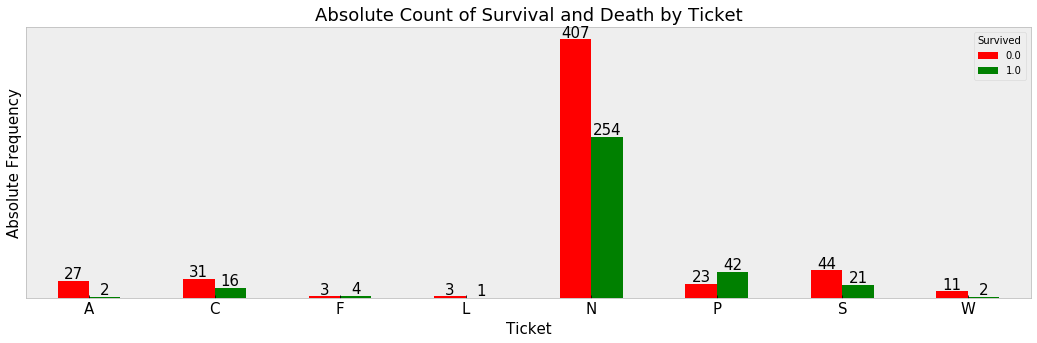

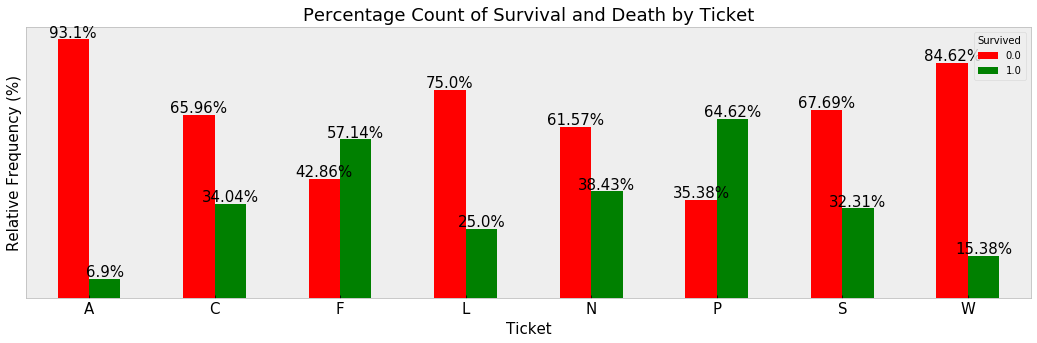

In [259]:
crosstab(df_train['Ticket'], df_train['Survived'])